# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# DONE: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
del train
del test

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# DONE: Number of training examples
n_train = len(X_train)

# DONE: Number of testing examples.
n_test = len(X_test)

# DONE: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# DONE: How many unique classes/labels there are in the dataset.
# create a list of UNIQUE Labels
labelSet = np.unique(y_test)
#print(labelSet)
n_classes = len(labelSet)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Label#     0  -  Speed limit (20km/h)                                ===> total training Samples: 210
Label#     1  -  Speed limit (30km/h)                                ===> total training Samples: 2220
Label#     2  -  Speed limit (50km/h)                                ===> total training Samples: 2250
Label#     3  -  Speed limit (60km/h)                                ===> total training Samples: 1410
Label#     4  -  Speed limit (70km/h)                                ===> total training Samples: 1980
Label#     5  -  Speed limit (80km/h)                                ===> total training Samples: 1860
Label#     6  -  End of speed limit (80km/h)                         ===> total training Samples: 420
Label#     7  -  Speed limit (100km/h)                               ===> total training Samples: 1440
Label#     8  -  Speed limit (120km/h)                               ===> total training Samples: 1410
Label#     9  -  No passing                                          ===> t

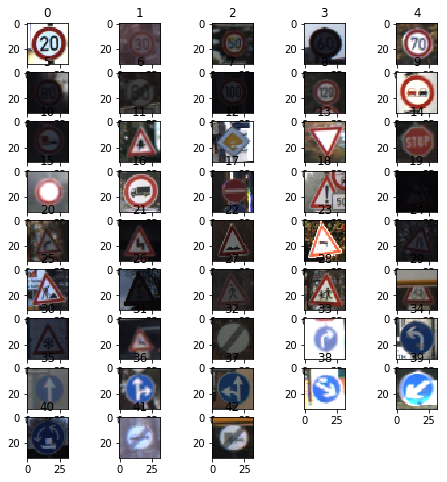

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Routine to find the indices in training set for a given label
def findIndexOfLabel(lst, a):
    result = []
    for i, x in enumerate(lst):
        if x == a:
            result.append(i)
    return result

plt.close('all')
indexList = []
fig = plt.figure(figsize=(8,8))

gtFile = open('signnames.csv') # signname file
gtReader = csv.reader(gtFile, delimiter=',') # csv parser for signnames file
next(gtReader, None)  # skip the headers

#Also create a dictionary of Label - Description pair
signDict = dict()

for row in gtReader:
    indices = findIndexOfLabel(y_train, int(row[0])) 
    #print("Read label = ", row[0],"and clas is = ", row[1])
    indexList.append(indices)
    
    #Show one random sample of each label
    
    #pick random indexed training image for the given label
    index = indices[random.randint(0, len(indices)-1)]
    image = X_train[index]   
    #Show as a Mosiac of Images
    a=fig.add_subplot(9,5,int(row[0])+1)
    plt.imshow(image) #, cmap="gray")
    a.set_title(row[0])
    print("Label#",'{:>5}'.format(y_train[index])," - ", '{:50}'.format(row[1])," ===> total training Samples:",len(indices))
    signDict[row[0]] = row[1]
    
#print(indexList)





Just notice the training images. Some are really dark and some are fully bright!!!!

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(120, 120, 3)
(32, 32, 3)
uint8
uint8


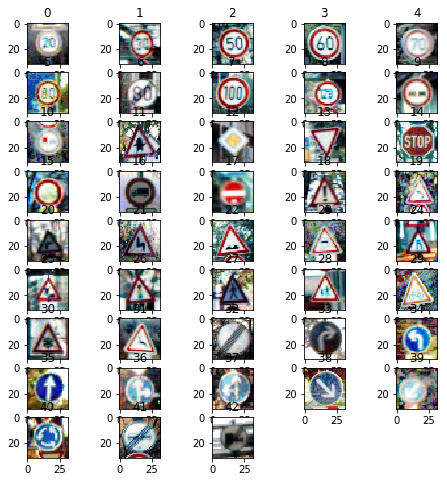

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn import preprocessing
from PIL import Image
import cv2

# From the visualization of images, it is evident few images are very bright and others are very dark.
# Hence it makes sense to normalize or histogram equalize the images so that info in each image appears clearly.
def normalize(arr):
    """
    Linear normalization
    """
    
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    newArr = arr.astype("uint8")
    return newArr

def normalize2(arr):
    """
    Hist Equalization
    """
    for i in range(3):
        arr[...,i] = cv2.equalizeHist(arr[...,i])
    newArr = arr.astype("uint8")
    return newArr
    
    
img = cv2.imread('new_images/Zeichen_206svg_Stop.png')
print(type(img))
print(type(X_train))
print(img.shape)
print(X_train[0].shape)
print(img.dtype)
print(X_train[0].dtype)

## Pre-processing Step
## normalize training dataset
for i in range(len(X_train)):
    X_train[i] = normalize2(X_train[i].astype('uint8'))
    X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2YUV)

## normalize testing dataset
for i in range(len(X_test)):
    X_test[i] = normalize2(X_test[i].astype('uint8'))
    X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2YUV)

## Does the images look proper now?  Not very bright and not very dark?
## let display some of training images
fig = plt.figure(figsize=(8,8))
for i in range(n_classes):
    index = indexList[i][random.randint(0, len(indexList[i]))]
    image = X_train[index] 
    a = fig.add_subplot(9,5,int(i)+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_YUV2BGR))#, cmap="gray")
    a.set_title(i)


    
meanImage = np.mean(X_train, axis=0)
#Take off the mean substraction affect
#meanImage = np.zeros((32, 32, 3))
#print(meanImage.dtype)

X_train = X_train.astype(float) - meanImage
X_test  = X_test.astype(float)  - meanImage
#X_train = X_train - meanImage
#X_test  = X_test  - meanImage
#print(X_train[0])



### Split Data into Training, Validation and Testing Sets

In [5]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

VALIDATION_PCENT = 20

## TRAINING DATASET would be untouched
## Lets have 20% of training dataset as validation dataset
## As 
##   the number of training samples for each label is not uniform
## &
##   the same label data are collocated in the training dataset 
## We would go after random 20% of training data for each label as validation dataset

indexValidList = []
indexTrainList = []

nX_train = []
ny_train = []
nX_valid = []
ny_valid = []

for label in labelSet:
    #if label > 0:
    #    continue
    origLabelTrainIndexList = indexList[label]
    k = len(origLabelTrainIndexList) * VALIDATION_PCENT // 100
    indicies = random.sample(range(len(origLabelTrainIndexList)), k)
    newLabelValidIndexList = [origLabelTrainIndexList[i] for i in indicies]
    newLabelTrainIndexList =  [x for x in origLabelTrainIndexList if x not in newLabelValidIndexList]
    indexValidList.append(newLabelValidIndexList)
    indexTrainList.append(newLabelTrainIndexList)
    
    #print(origLabelTrainIndexList)
    
    #Create the new Training dataset
    for i in newLabelValidIndexList:
        ny_valid.append(y_train[i])
        nX_valid.append(X_train[i])
    
    #Create the new Validation dataset
    for i in newLabelTrainIndexList:
        ny_train.append(y_train[i])
        nX_train.append(X_train[i])
    
# DONE: Number of training examples
n_train = len(nX_train)
# DONE: Number of validation examples
n_valid = len(nX_valid)
# DONE: Number of testing examples.
n_test = len(X_test)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("n_train + n_valid = ", n_train+n_valid)
print("orig training examples= ", len(X_train))


from sklearn.utils import shuffle

#Shuffle the training data
nX_train, ny_train = shuffle(nX_train, ny_train)



Number of training examples = 31368
Number of validation examples = 7841
Number of testing examples = 12630
n_train + n_valid =  39209
orig training examples=  39209


### Model Architecture

In [6]:
import tensorflow as tf

from tensorflow.contrib.layers import flatten
### Define your architecture here.
### Feel free to use as many code cells as needed.


# For now use the LeNet as is to see 
def TscNet(x, mu = 0, sigma = 0.1):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    #mu = 0
    #sigma = 0.1
    
    # More of 1x1 Convolution
    # SOLUTION: Layer 0: Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='SAME') + conv0_b

    # SOLUTION: Activation.
    conv0 = tf.nn.relu(conv0)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 30x30x6. Output = 15x15x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 11x11x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 11x11x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

# For now use the LeNet as is to see 
def LeNet(x, mu = 0, sigma = 0.1):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    #mu = 0
    #sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
EPOCHS = 20
BATCH_SIZE = 128


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Hyper -parameters
rate = 0.001
mu = 0
sigma = 0.1

#logits = LeNet(x, mu, sigma)
logits = TscNet(x, mu, sigma)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(nX_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        nX_train, ny_train = shuffle(nX_train, ny_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = nX_train[offset:end], ny_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(nX_valid, ny_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    savePath = saver.save(sess, './lenet')
    print("Model saved")



Training...

EPOCH 1 ...
Validation Accuracy = 0.794

EPOCH 2 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.905

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.928

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.936

EPOCH 15 ...
Validation Accuracy = 0.940

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.939

Model saved


In [8]:


## Test the model with test dataset

with tf.Session() as sess:
    saver.restore(sess, savePath) 

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    valid_accuracy = evaluate(nX_valid, ny_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))
    train_accuracy = evaluate(nX_train, ny_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Test Accuracy = 0.852
Valid Accuracy = 0.939
Valid Accuracy = 0.989


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

NewImageFileName :  120px-Zeichen_131svg_Traffic_signals.png            shape:  (120, 105)
NewImageFileName :  Zeichen_112_–_Unebene_Fahrbahn,_StVO_1970svg_Bumpy_road.png  shape:  (120, 105)
NewImageFileName :  Zeichen_136-10_-_Kinder,_Aufstellung_rechts,_StVO_1992svg_ChildrenCrossing.png  shape:  (120, 106)
NewImageFileName :  Zeichen_206svg_Stop.png                             shape:  (120, 120)
NewImageFileName :  Zeichen_267svg_NoEntry.png                          shape:  (120, 120)


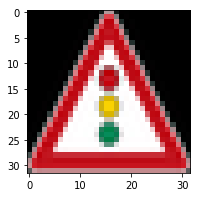

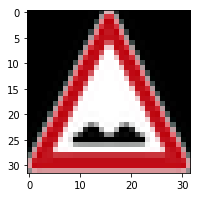

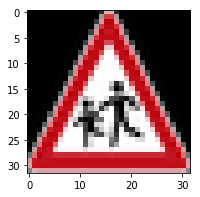

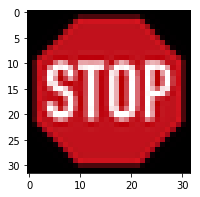

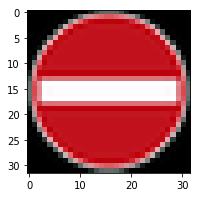

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
from PIL import Image

prefix = "new_images/"
import os
fileList = list()
fileList = os.listdir(prefix)
#fileList

nX_test = []
ny_test = [] 

#Read those images and display also

# as input images have different sizes there is a need to scale to dimension of 25x25 
# Also need to drop the Alpha channel


gtFile = open(prefix+'filenames.csv') # signname file
gtReader = csv.reader(gtFile, delimiter=',') # csv parser for signnames file
next(gtReader, None)  # skip the headers


#for fileName in fileList:
for row in gtReader:
    fileName = row[0]
    label = int(row[1])
    #print(label)
    newImage = Image.open(prefix + fileName).convert('RGB')
    fig = plt.figure(figsize=(3,3))
    #plt.imshow(newImage)
    print("NewImageFileName : ", '{:50}'.format(fileName)," shape: ", newImage.size)
    
    resizeImage = newImage.resize((32, 32), Image.ANTIALIAS)
    #plt.imshow(resizeImage)
    resizeImage.save('tmp.png')
    image = cv2.imread('tmp.png')
    #print(type(image))
    #print("NewImageFileName : ", '{:50}'.format(fileName)," shape: ", image.shape)
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    normalizedImage = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    plt.imshow(cv2.cvtColor(normalizedImage, cv2.COLOR_YUV2BGR) )
    nX_test.append(normalizedImage)
    #nX_test = np.append(nX_test,  normalizedImage, axis=0)
    ny_test.append(label)
    

ny_test = np.array(ny_test)
nX_test = np.array(nX_test)
nX_test = nX_test.astype(float) -  meanImage
    
    
    
    
    
    

### Predict the Sign Type for Each Image

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction = tf.argmax(logits, 1)
probability = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs = sess.run(prediction, feed_dict={x: nX_test, y: ny_test})
    probs = sess.run(probability, feed_dict={x: nX_test, y: ny_test})
    top5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    print("predicted signs : ", signs)
    print("actual signs    : ", ny_test)
    #print(probs[0])
    #print(top5[0][0])

predicted signs :  [26 25 28 14 17]
actual signs    :  [26 22 28 14 17]


### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
total_new_images = len(ny_test)
accuracy_new_images = 0.0
#print(type(signs))
#print(type(ny_test))
for i in range(len(ny_test)):
    actual_sign = int(ny_test[i])
    predict_sign = signs[i]
    #print(actual_sign, predict_sign)
    if (actual_sign == predict_sign):
        accuracy_new_images += 1
print("Accuracy achieved on new images (in %) :", accuracy_new_images*100.0/float(total_new_images))

Accuracy achieved on new images (in %) : 80.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [12]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print("#############################################################")
for i in range(len(ny_test)):
    print("newImage#",'{:>5}'.format(i),": Actual label is ", ny_test[i])
    print("  Top5 predictions:   ", top5[1][i])
    print("  Top5 probabilities: ", top5[0][i])
    print("#############################################################")


#############################################################
newImage#     0 : Actual label is  26
  Top5 predictions:    [26 11 18 17 31]
  Top5 probabilities:  [  1.00000000e+00   2.02661843e-09   1.63261571e-10   6.25276686e-13
   7.73262042e-16]
#############################################################
newImage#     1 : Actual label is  22
  Top5 predictions:    [25 22 29 31 20]
  Top5 probabilities:  [  9.99250829e-01   7.04607519e-04   4.42829514e-05   2.77712985e-07
   2.80434964e-08]
#############################################################
newImage#     2 : Actual label is  28
  Top5 predictions:    [28 29 25 23 30]
  Top5 probabilities:  [  8.14694703e-01   1.83964357e-01   1.34079636e-03   1.09334955e-07
   2.59716915e-09]
#############################################################
newImage#     3 : Actual label is  14
  Top5 predictions:    [14  1 13 17 25]
  Top5 probabilities:  [  9.99792755e-01   1.26043786e-04   8.00272828e-05   1.01243961e-06
   2.67968602e-

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 